# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

## Assignment 1

This is the first graded assignment of the course. You have to elaborate on the problems described below and provide code and explanations of your findings. The assignment should be completed entirely in this Jupyter Notebook filling in the appropriate sections. You could add blocks (code and markdown) to accomodate your solutions, however, try to maintain the current structure and order. 

Before submitting your solution, rename the file adding your full name at the beginning. For example, this would be my submission: 

**karsai_marton_assignment1_2022.ipynb**

Please, this is an individual test, don't copy. You may work with friends to help guide problem solving or consult
stack overflow (or similar) to work out a solution, but copying — from friends, previous students, or the Internet — is prohibited (and mostly not useful at all!). NEVER copy blindly blocks of code – it's really easy to tell. If caught cheating, I'm afraid you will fail this course. I'm pretty sure this is not gonna happen, for every issue, suggestion, doubt, the easiest solution is always to come to talk with the instructor or the TA.   


## Problems:

You will find the file **wine.csv** in the assignment folder. This datasets contains the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis quantified 13 different properties of the three types of wines. 

    The features represent the following properties:

    1. Alcohol content
    2. Malic acid content
    3. Ash content
    4. Alcalinity of ash 
    5. Magnesium content
    6. Total phenol content 
    7. Flavanoid content 
    8. Nonflavanoid phenol content 
    9. Proanthocyanin content 
    10. Color intensity 
    11. Hue 
    12. OD280/OD315 absorbance of diluted wines 
    13. Proline concentration 

    The first column (target variable) contains the information about the three different cultivars marked by 1, 2, and 3. 

1. Explore the data: use the approaches presented during the class to discuss the distribution of the typical parameters in each class. Which are more and less diverse? Rank the features based on their relative variance (variance divided by the mean of the set) of their distribution. Study the correlations between features. Which two are the most correlated? The goal of this part is to explore the features space to identify potential issues and instruct the pre-processing phase, e.g., normalization, missing values, feature engeneering (we'll explore these concepts better in the next classes).

2. Build a DecisionTreeClassifier with arbitrary depth, split the data into training and test sets, and measure the accuracy of the model on both (note: one measurement is no measurement, so make sure you repeat the randomization multiple times). Use alternative metrics that give you a better idea of the model performance. Try different ratios regarding the size of the training and the test sets and see how the accuriacies change. How does this change varies for different depth values? Can you observe the occurrance of under/overfitting? Is that consistent with your theoretical expectations? 

3. Solve the wine classification problem with 3-NN and evaluate it with 5-fold cross-validation. 

4. Output the accuracy of a k-NN classifier with the best value of the hyperparameter k. Comment your solution and the performance beyond accuracy. 

5. Which model would you pick (DecisionTree or k-NN) to solve the problem in a business context?     

# Solution 1

In [1]:
import pandas as pd 

wine_df = pd.read_csv("wine.csv")
wine_df.shape

(178, 14)

In [2]:
wine_df.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Prepare the data
    
* y: labels
* X: features space 

In [3]:
y = wine_df['wine'].values
X = wine_df.iloc[:, 1:].values

In [4]:
features_names = wine_df.columns.values[1:]
features_names

array(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '], dtype=object)

### Data exploration and preparation

In [5]:
import numpy as np
import seaborn as sns

# Get the summary statistics for each class
wine_df.groupby('wine').describe()

Alcohol                                                             \
       count       mean       std    min     25%     50%     75%    max   
wine                                                                      
1       59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
2       71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
3       48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

     Malic acid            ... OD280/OD315 of diluted wines       Proline   \
          count      mean  ...                          75%   max    count   
wine                       ...                                               
1          59.0  2.010678  ...                         3.42  4.00     59.0   
2          71.0  1.932676  ...                         3.16  3.69     71.0   
3          48.0  3.333750  ...                         1.82  2.47     48.0   

                                                                     
             mean         std    min    25%     50%     75%     max  
wine                                                                 
1     1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
2      519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
3      629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

In [18]:
# Check for null values

wine_df.isnull().sum()

wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [31]:
#Count the NaN values

wine_df.isna().sum()

wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [19]:
wine_df.var()

wine                                0.600679
Alcohol                             0.659062
Malic acid                          1.248015
Ash                                 0.075265
Alcalinity of ash                  11.152686
Magnesium                         203.989335
Total phenols                       0.391690
Flavanoids                          0.997719
Nonflavanoid phenols                0.015489
Proanthocyanins                     0.327595
Color intensity                     5.374449
Hue                                 0.052245
OD280/OD315 of diluted wines        0.504086
Proline                         99166.717355
dtype: float64

<AxesSubplot: xlabel='wine', ylabel='Alcohol'>

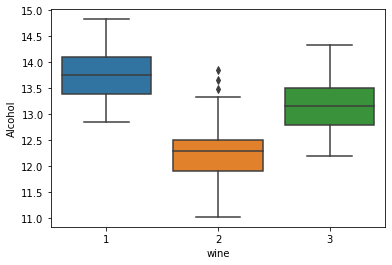

In [6]:
#Distribution of alcohol level in each class

sns.boxplot(x="wine", y="Alcohol", data=wine_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


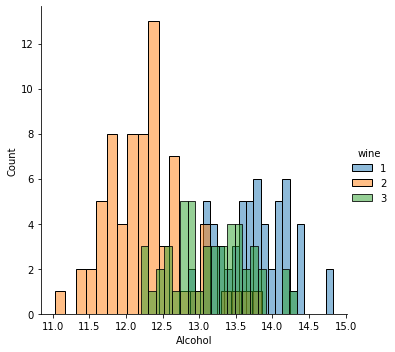

In [7]:
# Set up FacetGrid with histograms as they are easier to read compared to a boxplot

import matplotlib.pyplot as plt

g = sns.FacetGrid(wine_df, hue="wine", height=5)
g.map(sns.histplot, "Alcohol", alpha=.5, bins=20)
g.add_legend()

plt.show()

Apparently, alcohol is not the best feature to differentiate the wines as the amount of alcohol in wine 3 overlaps with the amoun in two other wines almost in entirety. Thus, I will explore other features.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


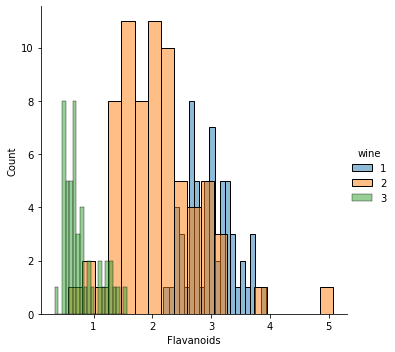

In [8]:
g = sns.FacetGrid(wine_df, hue="wine", height=5)
g.map(sns.histplot, "Flavanoids", alpha=.5, bins=20)
g.add_legend()

# Show plot
plt.show()

Flavanoids seem to be a better distinctive feature than alcohol, but not enough because the overlap between wine 1 and 3 is huge.<br> I will check the coefficient of variation and plot the top ones.

In [25]:
#Calculate the coefficient of variation for each feature
    
cov = wine_df.iloc[:, 1:].apply(lambda x: np.std(x) / np.mean(x))
cov.sort_values(ascending=False)

Flavanoids                      0.490841
Malic acid                      0.476814
Color intensity                 0.457043
Proline                         0.420437
Proanthocyanins                 0.358759
Nonflavanoid phenols            0.342965
Total phenols                   0.271922
OD280/OD315 of diluted wines    0.271087
Hue                             0.238058
Alcalinity of ash               0.170822
Magnesium                       0.142792
Ash                             0.115601
Alcohol                         0.062270
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


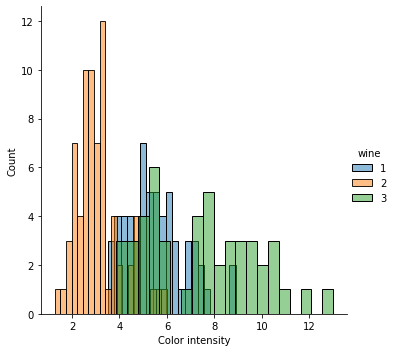

In [35]:
g = sns.FacetGrid(wine_df, hue="wine", height=5)
g.map(sns.histplot, "Color intensity", alpha=.5, bins=20)
g.add_legend()

# Show plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


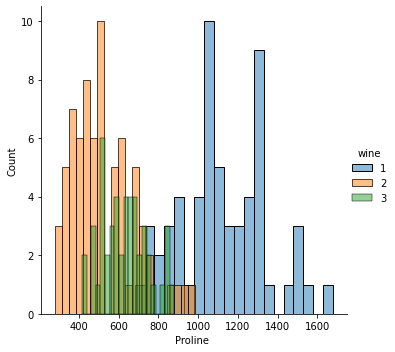

In [40]:
g = sns.FacetGrid(wine_df, hue="wine", height=5)
g.map(sns.histplot, "Proline ", alpha=.5, bins=20)
g.add_legend()

# Show plot
plt.show()

After plotting the distribution of all features as above, it was determined that alcohol and flavonoids the least overlap in values by wine type.

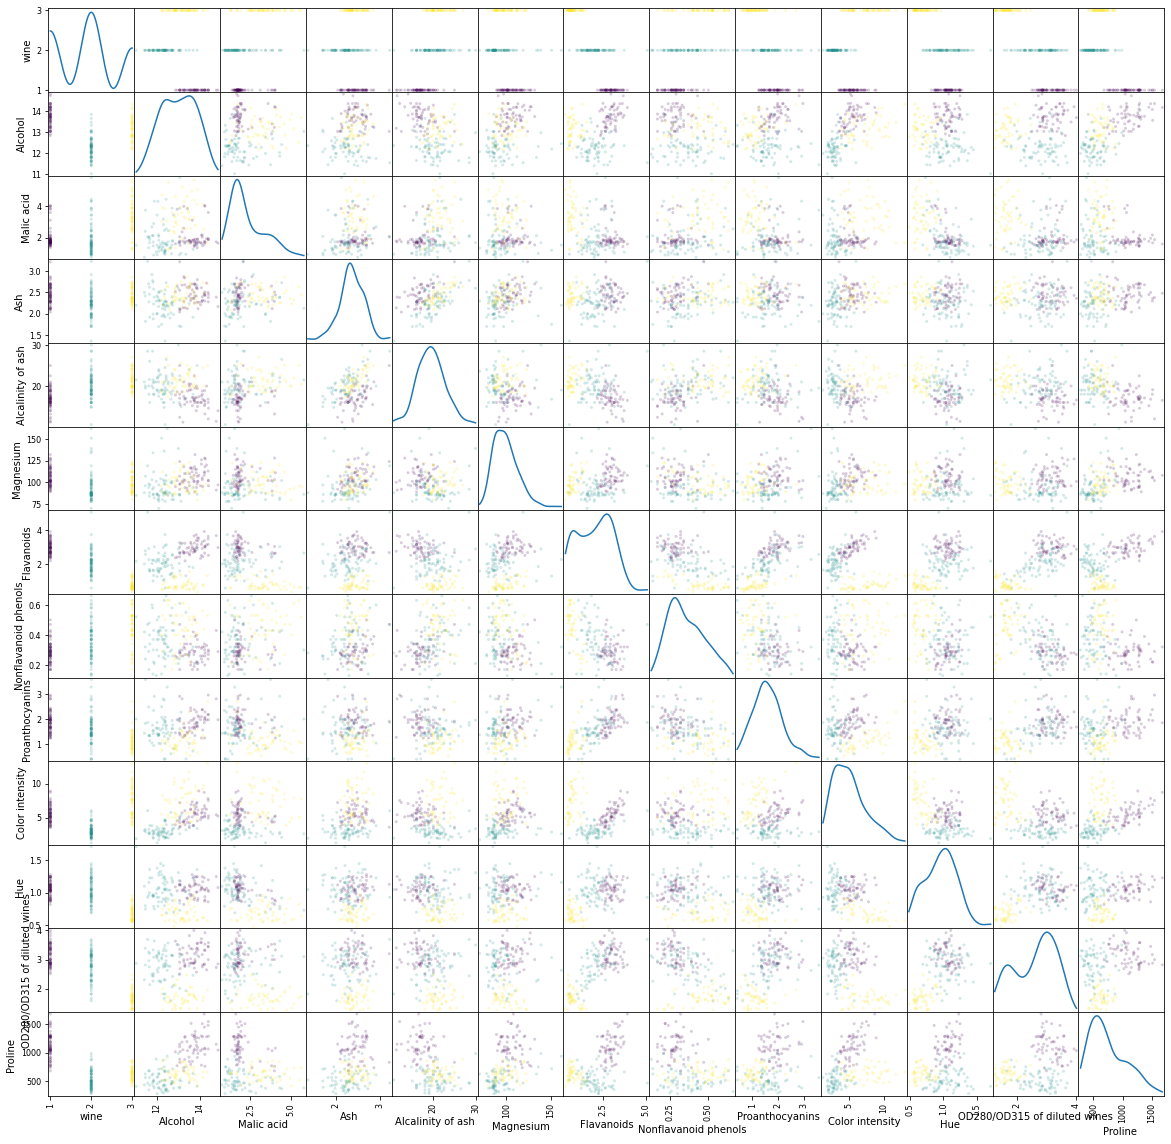

In [44]:
from pandas.plotting import scatter_matrix

scatter_matrix(wine_df, alpha = 0.2, c=y, figsize=(20, 20), diagonal='kde')
plt.show()

The scatter plots are a bit difficult to clearly observe the relationships in this case due to the size, so I will plot a heatmap of correlation of features below.

<AxesSubplot: >

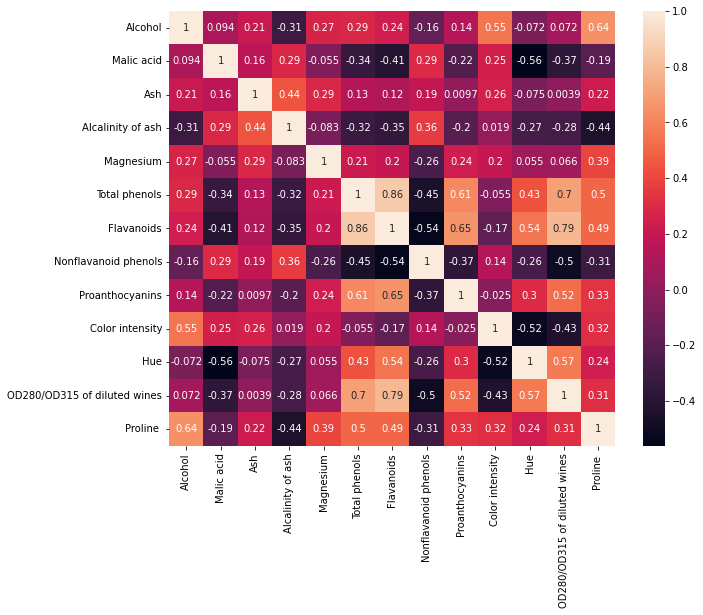

In [29]:
#Calculate the correlation between features

corr = wine_df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

The most correlated features are Flavanoids and Total phenols, Flavanoids and OD280...of diluted wines, Proanthocyanins and Flavanoids, Alcohol and Proline. <br>
Hight correlation between the features can affect the model performance by reducing the accuracy, increasing complexity and slowing the training process of the model when there are too many features. Increased complexity leads to overfitting and bad performance on new data (limited generalizability). <br>
We can drop one of the highly correlated features to reduce dimensionality or we can create a new feature by combining the two highly correlated features. 

To improve the model performance, I will drop total phenols and keep flavonoids. Since the dataset is quite small, we cannot afford dropping many features to reduce dimensionality.

In [41]:
wine_df = wine_df.drop(['Total phenols'], axis=1)

# Solution 2

I will calculate four measures of model performance: accuracy, F1, precision and recall for each trial.

In [53]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Create empty lists to store the means and st dev to plot later
accuracy_train_means = []
accuracy_train_stds = []
accuracy_test_means = []
accuracy_test_stds = []
f1_train_means = []
f1_train_stds = []
f1_test_means = []
f1_test_stds = []
precision_train_means = []
precision_train_stds = []
precision_test_means = []
precision_test_stds = []
recall_train_means = []
recall_train_stds = []
recall_test_means = []
recall_test_stds = []

# Loop through different depths and evaluate the decision tree classifier
for max_depth in range(1, 11):
    # Create empty lists to store the evaluation results
    accuracy_train_list = []
    accuracy_test_list = []
    f1_train_list = []
    f1_test_list = []
    precision_train_list = []
    precision_test_list = []
    recall_train_list = []
    recall_test_list = []

    # Repeat the randomization multiple times
    for i in range(10):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Create a decision tree classifier 
        tree = DecisionTreeClassifier(max_depth=max_depth)

        # Fit the decision tree classifier to the training data
        tree.fit(X_train, y_train)

        # Predict the classes of the training and test data
        y_train_pred = tree.predict(X_train)
        y_test_pred = tree.predict(X_test)

        # Compute the evaluation metrics for the training and test data
        accuracy_train = accuracy_score(y_train, y_train_pred)
        accuracy_test = accuracy_score(y_test, y_test_pred)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        precision_train = precision_score(y_train, y_train_pred, average='weighted')
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_train = recall_score(y_train, y_train_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')

        # Append the evaluation metrics to the lists above
        accuracy_train_list.append(accuracy_train)
        accuracy_test_list.append(accuracy_test)
        f1_train_list.append(f1_train)
        f1_test_list.append(f1_test)
        precision_train_list.append(precision_train)
        precision_test_list.append(precision_test)
        recall_train_list.append(recall_train)
        recall_test_list.append(recall_test)

        

# Append the evaluation metrics to the appropriate lists
    accuracy_train_means.append(accuracy_train)
    accuracy_train_stds.append(np.std(accuracy_train_list))
    accuracy_test_means.append(accuracy_test)
    accuracy_test_stds.append(np.std(accuracy_test_list))
    f1_train_means.append(f1_train)
    f1_train_stds.append(np.std(f1_train_list))
    f1_test_means.append(f1_test)
    f1_test_stds.append(np.std(f1_test_list))
    precision_train_means.append(precision_train)
    precision_train_stds.append(np.std(precision_train_list))
    precision_test_means.append(precision_test)
    precision_test_stds.append(np.std(precision_test_list))
    recall_train_means.append(recall_train)
    recall_train_stds.append(np.std(recall_train_list))
    recall_test_means.append(recall_test)
    recall_test_stds.append(np.std(recall_test_list))

    # Print the results
    print(f"Decision Tree Classifier with max_depth={max_depth}")
    print(f"Training Accuracy: {np.mean(accuracy_train_list):.3f} +/- {np.std(accuracy_train_list):.3f}")
    print(f"Test Accuracy: {np.mean(accuracy_test_list):.3f} +/- {np.std(accuracy_test_list):.3f}")
    print(f"Training F1 Score: {np.mean(f1_train_list):.3f} +/- {np.std(f1_train_list):.3f}")
    print(f"Test F1 Score: {np.mean(f1_test_list):.3f} +/- {np.std(f1_test_list):.3f}")
    print(f"Training Precision: {np.mean(precision_train_list):.3f} +/- {np.std(precision_train_list):.3f}")
    print(f"Test Precision: {np.mean(precision_test_list):.3f} +/- {np.std(precision_test_list):.3f}")
    print(f"Training Recall: {np.mean(recall_train_list):.3f} +/- {np.std(recall_train_list):.3f}")
    print(f"Test Recall: {np.mean(recall_test_list):.3f} +/- {np.std(recall_test_list):.3f}")
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

Decision Tree Classifier with max_depth=1
Training Accuracy: 0.692 +/- 0.024
Test Accuracy: 0.531 +/- 0.093
Training F1 Score: 0.602 +/- 0.020
Test F1 Score: 0.431 +/- 0.089
Training Precision: 0.556 +/- 0.018
Test Precision: 0.389 +/- 0.091
Training Recall: 0.692 +/- 0.024
Test Recall: 0.531 +/- 0.093

Decision Tree Classifier with max_depth=2
Training Accuracy: 0.930 +/- 0.018
Test Accuracy: 0.864 +/- 0.026
Training F1 Score: 0.930 +/- 0.018
Test F1 Score: 0.863 +/- 0.029
Training Precision: 0.937 +/- 0.015
Test Precision: 0.882 +/- 0.025
Training Recall: 0.930 +/- 0.018
Test Recall: 0.864 +/- 0.026

Decision Tree Classifier with max_depth=3
Training Accuracy: 0.985 +/- 0.008
Test Accuracy: 0.903 +/- 0.055
Training F1 Score: 0.985 +/- 0.008
Test F1 Score: 0.902 +/- 0.055
Training Precision: 0.985 +/- 0.008
Test Precision: 0.911 +/- 0.052
Training Recall: 0.985 +/- 0.008
Test Recall: 0.903 +/- 0.055

Decision Tree Classifier with max_depth=4
Training Accuracy: 0.997 +/- 0.005
Test Acc

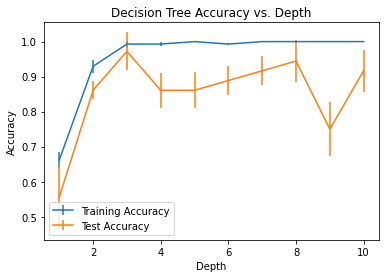

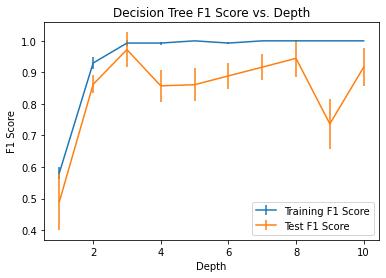

In [55]:
# Plot training and test accuracy
plt.errorbar(range(1,11), accuracy_train_means, yerr=accuracy_train_stds, label='Training Accuracy')
plt.errorbar(range(1,11), accuracy_test_means, yerr=accuracy_test_stds, label='Test Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and test F1 score
plt.errorbar(range(1,11), f1_train_means, yerr=f1_train_stds, label='Training F1 Score')
plt.errorbar(range(1,11), f1_test_means, yerr=f1_test_stds, label='Test F1 Score')
plt.title('Decision Tree F1 Score vs. Depth')
plt.xlabel('Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.show()


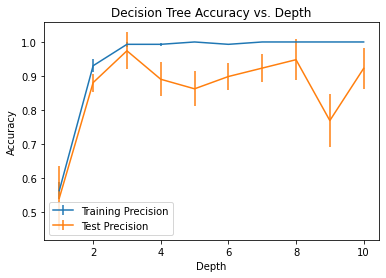

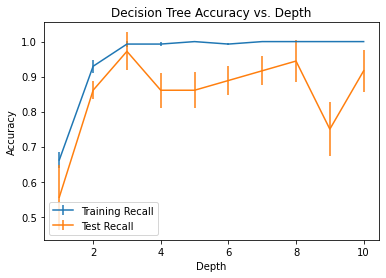

In [56]:
# Plot training and test precision
plt.errorbar(range(1,11), precision_train_means, yerr=accuracy_train_stds, label='Training Precision')
plt.errorbar(range(1,11), precision_test_means, yerr=accuracy_test_stds, label='Test Precision')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and test recall
plt.errorbar(range(1,11), recall_train_means, yerr=accuracy_train_stds, label='Training Recall')
plt.errorbar(range(1,11), recall_test_means, yerr=accuracy_test_stds, label='Test Recall')
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [57]:
# Run the same code with different train and test size: 0.5-0.5


# Create empty lists to store the means and st dev to plot later
accuracy_train_means = []
accuracy_train_stds = []
accuracy_test_means = []
accuracy_test_stds = []
f1_train_means = []
f1_train_stds = []
f1_test_means = []
f1_test_stds = []
precision_train_means = []
precision_train_stds = []
precision_test_means = []
precision_test_stds = []
recall_train_means = []
recall_train_stds = []
recall_test_means = []
recall_test_stds = []

# Loop through different depths and evaluate the decision tree classifier
for max_depth in range(1, 11):
    # Create empty lists to store the evaluation results
    accuracy_train_list = []
    accuracy_test_list = []
    f1_train_list = []
    f1_test_list = []
    precision_train_list = []
    precision_test_list = []
    recall_train_list = []
    recall_test_list = []

    # Repeat the randomization multiple times
    for i in range(10):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # Create a decision tree classifier 
        tree = DecisionTreeClassifier(max_depth=max_depth)

        # Fit the decision tree classifier to the training data
        tree.fit(X_train, y_train)

        # Predict the classes of the training and test data
        y_train_pred = tree.predict(X_train)
        y_test_pred = tree.predict(X_test)

        # Compute the evaluation metrics for the training and test data
        accuracy_train = accuracy_score(y_train, y_train_pred)
        accuracy_test = accuracy_score(y_test, y_test_pred)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')
        precision_train = precision_score(y_train, y_train_pred, average='weighted')
        precision_test = precision_score(y_test, y_test_pred, average='weighted')
        recall_train = recall_score(y_train, y_train_pred, average='weighted')
        recall_test = recall_score(y_test, y_test_pred, average='weighted')

        # Append the evaluation metrics to the lists above
        accuracy_train_list.append(accuracy_train)
        accuracy_test_list.append(accuracy_test)
        f1_train_list.append(f1_train)
        f1_test_list.append(f1_test)
        precision_train_list.append(precision_train)
        precision_test_list.append(precision_test)
        recall_train_list.append(recall_train)
        recall_test_list.append(recall_test)

        

# Append the evaluation metrics to the appropriate lists
    accuracy_train_means.append(accuracy_train)
    accuracy_train_stds.append(np.std(accuracy_train_list))
    accuracy_test_means.append(accuracy_test)
    accuracy_test_stds.append(np.std(accuracy_test_list))
    f1_train_means.append(f1_train)
    f1_train_stds.append(np.std(f1_train_list))
    f1_test_means.append(f1_test)
    f1_test_stds.append(np.std(f1_test_list))
    precision_train_means.append(precision_train)
    precision_train_stds.append(np.std(precision_train_list))
    precision_test_means.append(precision_test)
    precision_test_stds.append(np.std(precision_test_list))
    recall_train_means.append(recall_train)
    recall_train_stds.append(np.std(recall_train_list))
    recall_test_means.append(recall_test)
    recall_test_stds.append(np.std(recall_test_list))

    # Print the results
    print(f"Decision Tree Classifier with max_depth={max_depth}")
    print(f"Training Accuracy: {np.mean(accuracy_train_list):.3f} +/- {np.std(accuracy_train_list):.3f}")
    print(f"Test Accuracy: {np.mean(accuracy_test_list):.3f} +/- {np.std(accuracy_test_list):.3f}")
    print(f"Training F1 Score: {np.mean(f1_train_list):.3f} +/- {np.std(f1_train_list):.3f}")
    print(f"Test F1 Score: {np.mean(f1_test_list):.3f} +/- {np.std(f1_test_list):.3f}")
    print(f"Training Precision: {np.mean(precision_train_list):.3f} +/- {np.std(precision_train_list):.3f}")
    print(f"Test Precision: {np.mean(precision_test_list):.3f} +/- {np.std(precision_test_list):.3f}")
    print(f"Training Recall: {np.mean(recall_train_list):.3f} +/- {np.std(recall_train_list):.3f}")
    print(f"Test Recall: {np.mean(recall_test_list):.3f} +/- {np.std(recall_test_list):.3f}")
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

Decision Tree Classifier with max_depth=1
Training Accuracy: 0.693 +/- 0.035
Test Accuracy: 0.612 +/- 0.044
Training F1 Score: 0.607 +/- 0.035
Test F1 Score: 0.509 +/- 0.062
Training Precision: 0.565 +/- 0.036
Test Precision: 0.459 +/- 0.073
Training Recall: 0.693 +/- 0.035
Test Recall: 0.612 +/- 0.044

Decision Tree Classifier with max_depth=2
Training Accuracy: 0.944 +/- 0.019
Test Accuracy: 0.878 +/- 0.034
Training F1 Score: 0.944 +/- 0.019
Test F1 Score: 0.876 +/- 0.034
Training Precision: 0.950 +/- 0.015
Test Precision: 0.883 +/- 0.034
Training Recall: 0.944 +/- 0.019
Test Recall: 0.878 +/- 0.034

Decision Tree Classifier with max_depth=3
Training Accuracy: 0.988 +/- 0.020
Test Accuracy: 0.889 +/- 0.036
Training F1 Score: 0.988 +/- 0.020
Test F1 Score: 0.888 +/- 0.037
Training Precision: 0.988 +/- 0.019
Test Precision: 0.895 +/- 0.036
Training Recall: 0.988 +/- 0.020
Test Recall: 0.889 +/- 0.036

Decision Tree Classifier with max_depth=4
Training Accuracy: 0.998 +/- 0.007
Test Acc

When the test set size increased and train set size decreased, the model performance on test set worsened and took longer time to reach 0.90 accuracy level.<br>
Basically, when the train set is small and test set large, we observe underfitting and it takes the tree to go into longer depths to reach higher accuracy. However, if we decrease the test size and increase the train size, let's say, in 90/10 ratio, then we overfit our model, i.e., overtrain. As a result, the model performs really well on the train set but it cannot do that well on the test set because the algorithm learned the patterns in the train data to predict well, but the patterns in the new data might not be the same.

### Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[22  4  0]
 [ 1 34  1]
 [ 0  1 26]]


### Classification report

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.96      0.85      0.90        26
           2       0.87      0.94      0.91        36
           3       0.96      0.96      0.96        27

    accuracy                           0.92        89
   macro avg       0.93      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89



### Optimization

Optimal hyperparameters: {'max_depth': 4}
Cross-validation score: 0.9049206349206349


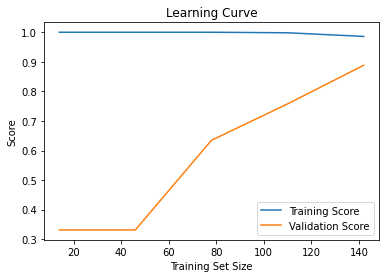

In [64]:
from sklearn.model_selection import GridSearchCV, learning_curve

# Define the hyperparameter grid
param_grid = {'max_depth': range(1, 21)}

# Perform grid search with cross-validation
grid = GridSearchCV(tree, param_grid, cv=5)
grid.fit(X, y)

# Print the optimal hyperparameters and the corresponding cross-validation score
print("Optimal hyperparameters:", grid.best_params_)
print("Cross-validation score:", grid.best_score_)

# Compute the learning curve for the optimal hyperparameters
train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

# Solution 3

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Create a 3-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Create a 5-fold cross-validation object
cv = KFold(n_splits=5)

# Evaluate the classifier with 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=cv)

# Print the mean accuracy across all folds
print("Mean Accuracy: ", scores.mean())

Mean Accuracy:  0.5992063492063492


# Solution 4

In [79]:
# Define the range of k values to evaluate
k_values = list(range(1, 21))

# Use cross-validation to evaluate the performance of the k-NN classifier for each k value
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    mean_scores.append(scores.mean())

# Find the index of the maximum mean score
best_index = mean_scores.index(max(mean_scores))

# Get the best k value and its corresponding mean score
best_k = k_values[best_index]
best_score = mean_scores[best_index]

print(f"Best k: {best_k}")
print(f"Best mean score: {best_score}")

Best k: 1
Best mean score: 0.7250793650793651


In [80]:
# Create a new k-NN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Compute the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6741573033707865


# Solution 5

In this context and with the given dataset, I would choose DecisionTree model because it is producing more accurate predictions than the k-NN model.
Moreover, the results of the DecisionTree model is easier to interpret, it shows which features are important at making predictions. Also, DecisionTree model runs faster and a less expensive method compared to k-NN model.